# Script Assignment 5

**Your name:** Katelyn Choudhari             

**Your ID:** 5368756

Use the "Stock_px" dataset and address the following functions.kdown cell.

Draw line plot for each of the stocks separately/individually - 2 points

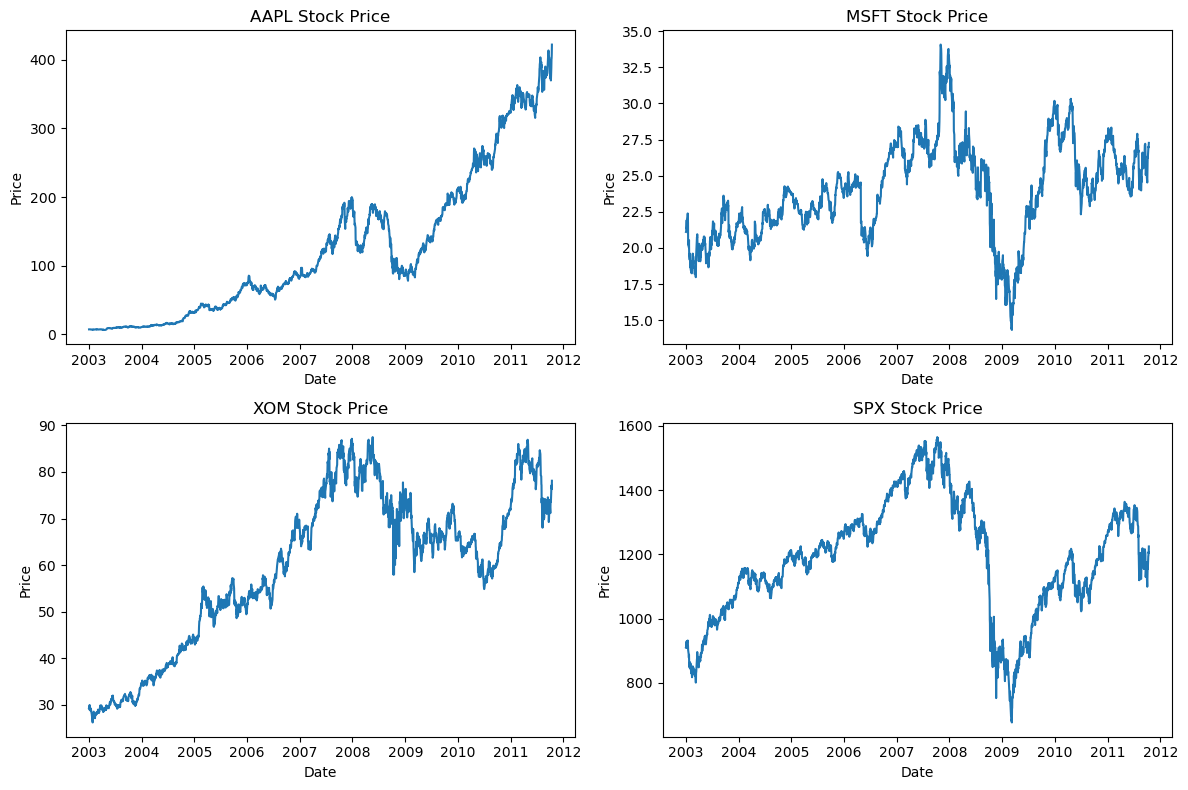

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

#load the data into a dataframe
stocksDF = pd.read_csv('stock_px.csv')

#convert date column to datetime format and set as index
stocksDF['Date'] = pd.to_datetime(stocksDF['Unnamed: 0'])
stocksDF.set_index('Date', inplace=True)
stocksDF.drop(columns = ['Unnamed: 0'], inplace=True)

#list of stocks
stockTitles = ['AAPL', 'MSFT', 'XOM', 'SPX']

#plot each stock separately
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

for ax, stock in zip(axes.flatten(), stockTitles):
    ax.plot(stocksDF.index, stocksDF[stock])
    ax.set_title(f'{stock} Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

Draw line, scatter, box plot for each of the stocks within the same subplot - 2 points

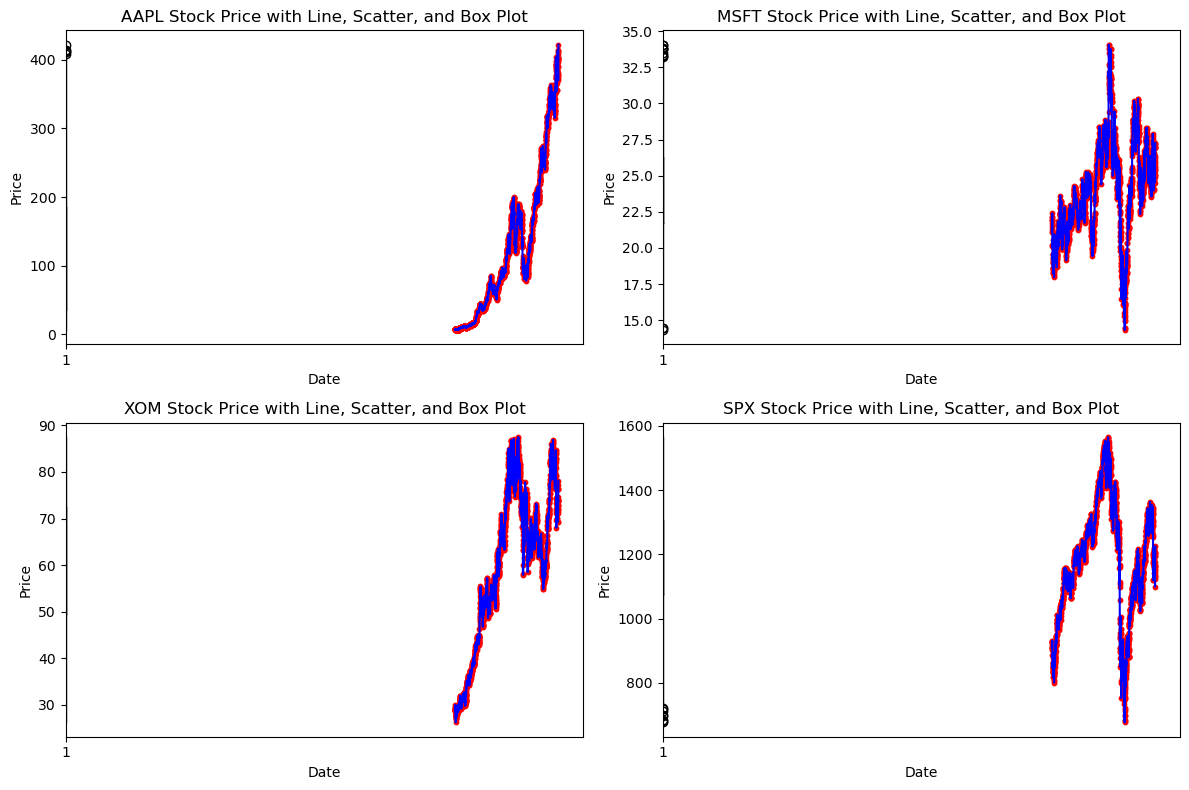

In [5]:
#line, scatter and box plot for each stock in the same subplot
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

#list of stocks
stock_names = ['AAPL', 'MSFT', 'XOM', 'SPX']

for ax, stock in zip(axes.flatten(), stockTitles):
    #line plot
    ax.plot(stocksDF.index, stocksDF[stock], label = f'{stock} Line', color = 'blue')
    #scatter plot
    ax.scatter(stocksDF.index, stocksDF[stock], label = f'{stock} Scatter', color = 'red', s = 10)
    #box plot
    ax.boxplot(stocksDF[stock], positions = [1], widths = 0.1)  #put boxplot at x = 1
    ax.set_title(f'{stock} Stock Price with Line, Scatter, and Box Plot')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

Draw a linear regression model fit for apple stock - 2 points

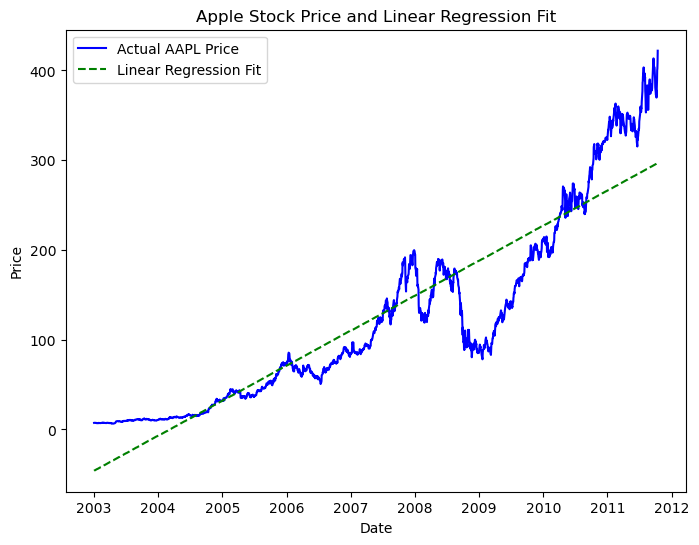

In [7]:
#linear regression model fit for Apple stock
X = np.arange(len(stocksDF)).reshape(-1, 1)
y = stocksDF['AAPL'].values
model = LinearRegression().fit(X, y)
predictedAAPL = model.predict(X)

#plot actual vs predicted values
plt.figure(figsize = (8, 6))
plt.plot(stocksDF.index, stocksDF['AAPL'], label = 'Actual AAPL Price', color = 'blue')
plt.plot(stocksDF.index, predictedAAPL, label = 'Linear Regression Fit', color = 'green', linestyle = '--')
plt.title('Apple Stock Price and Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Draw a dotted line plot for SPX and mark all the peak points at various timesteps - 2 points

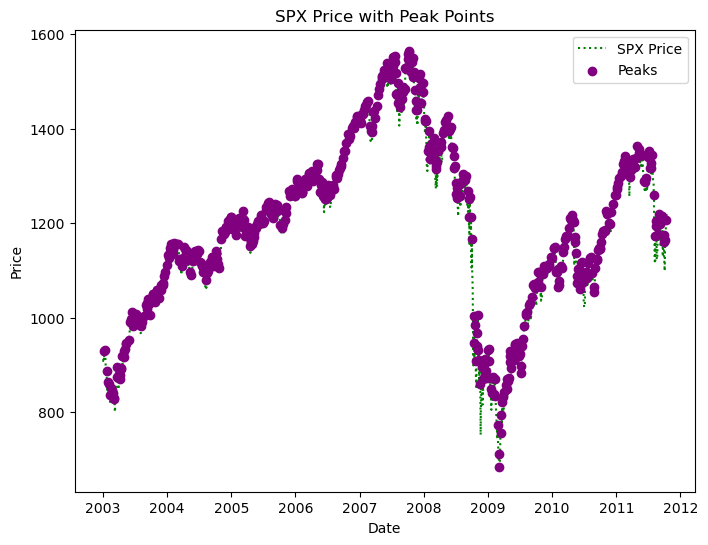

In [12]:
#dotted line plot for SPX and marking all peak points
plt.figure(figsize = (8, 6))
plt.plot(stocksDF.index, stocksDF['SPX'], label = 'SPX Price', linestyle = ':', color = 'green')

#identify peak points
peaks = stocksDF['SPX'][(stocksDF['SPX'].shift(1) < stocksDF['SPX']) & (stocksDF['SPX'].shift(-1) < stocksDF['SPX'])]
plt.scatter(peaks.index, peaks.values, color = 'purple', label = 'Peaks', zorder = 5)

plt.title('SPX Price with Peak Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Using Seaborn plot pairwise.  - 2 points

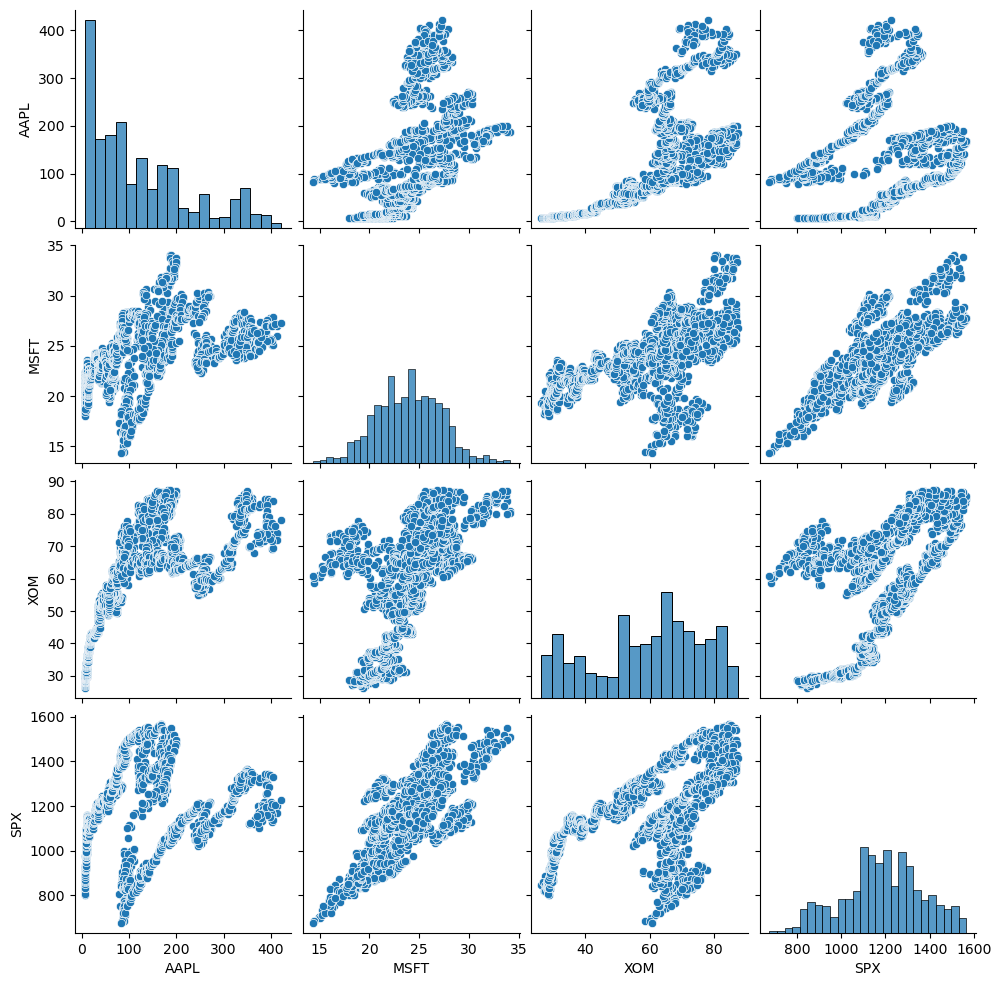

In [15]:
#seaborn pairplot for all stocks
sns.pairplot(stocksDF[['AAPL', 'MSFT', 'XOM', 'SPX']])
plt.show()